<a href="https://colab.research.google.com/github/MhAmine/intro-to-NLP-Workshop/blob/main/Sentiment_Analysis_with_Transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sentiment Analysis
Determining whether a text is positive, negative, or neutral.

### 1.  Using TextBlob (Works for English & French)
- TextBlob Uses a pre-trained lexicon-based approach

In [ ]:
from textblob import TextBlob

text_en = "I love Natural Language Processing!"
text_fr = "J'adore le traitement du langage naturel!"

print("English Sentiment:", TextBlob(text_en).sentiment)
print("French Sentiment:", TextBlob(text_fr).sentiment)


English Sentiment: Sentiment(polarity=0.3125, subjectivity=0.5)
French Sentiment: Sentiment(polarity=0.0, subjectivity=0.0)


### Interpretations

- Computes Polarity (-1 to 1) based on a dictionary of words.

- Positive words: 😊 ("great" → +0.8)
- Negative words: 😡 ("horrible" → -0.9)
- Subjectivity (0 to 1): Measures opinion vs. fact.

 ### Limitation:

Works well for simple texts but fails for sarcasm or complex sentences.

### 2. Using VADER for French Sentiment Analysis

###  Step 1: Install VADER Adapted for French

In [ ]:
!pip install vaderSentiment-fr


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.1/187.1 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 12.5 MB/s eta 0:00:00
  Created wheel for vaderSentiment-fr: filename=vaderSentiment_fr-1.3.4-py3-none-any.whl size=185960 sha256=67ab0a3cc636c58d2669a52497c67757161abec9c4588f4d8a1642e71295eb6d
  Stored in directory: /root/.cache/pip/wheels/8d/e4/ff/3e94e0307a5f26b7214fe85d68972f38b2302f10e25330309d
Successfully built vaderSentiment-fr


### Step 2: Perform Sentiment Analysis

In [ ]:
from vaderSentiment_fr.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer for French
analyzer = SentimentIntensityAnalyzer()

# Example texts
texts = [
    "J'adore ce produit, il est exceptionnel !",
    "Ce fut une terrible expérience, je suis déçu.",
    "Le service est acceptable, rien d'extraordinaire."
]

# Analyze sentiment
for text in texts:
    scores = analyzer.polarity_scores(text)
    print(f"Texte: {text}\nScore: {scores}\n")


/usr/local/lib/python3.11/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


Texte: J'adore ce produit, il est exceptionnel !
Score: {'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'compound': 0.2244}

Texte: Ce fut une terrible expérience, je suis déçu.
Score: {'neg': 0.348, 'neu': 0.652, 'pos': 0.0, 'compound': -0.296}

Texte: Le service est acceptable, rien d'extraordinaire.
Score: {'neg': 0.325, 'neu': 0.504, 'pos': 0.171, 'compound': -0.3653}



### Interpretation

 How Vader Works:

- Lexicon-based approach: Assigns scores based on words.

- Returns 4 values:
- compound: Overall sentiment score (-1 to 1)
- pos: Positive percentage
- neu: Neutral percentage
- neg: Negative percentage

Works well for short texts like tweets, reviews, or comments.

## 3. Using Pre-trained Transformer (CamemBERT)

### Step 1: Load the CamemBERT Model for Sentiment Analysis
CamemBERT is a state-of-the-art model for French NLP, trained by the French NLP community.

In [ ]:

from transformers import pipeline

# Load the sentiment analysis model
sentiment_analyzer = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")



/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


Texte: Ce film est absolument incroyable, j'ai adoré ! 
Sentiment: [{'label': '5 stars', 'score': 0.9131935834884644}]

Texte: Ce restaurant était une catastrophe, service horrible. 
Sentiment: [{'label': '1 star', 'score': 0.927309513092041}]

Texte: Le produit est correct, mais la livraison était lente. 
Sentiment: [{'label': '3 stars', 'score': 0.7154709100723267}]



### Step 2: Perform Sentiment Analysis

In [ ]:
# Example French texts
texts = [
    "Ce film est absolument incroyable, j'ai adoré !",   # Positive
    "Ce restaurant était une catastrophe, service horrible.",  # Negative
    "Le produit est correct, mais la livraison était lente."  # Neutral
]

# Analyze sentiment
for text in texts:
    result = sentiment_analyzer(text)
    print(f"Texte: {text} \nSentiment: {result}\n")


Texte: Ce film est absolument incroyable, j'ai adoré ! 
Sentiment: [{'label': '5 stars', 'score': 0.9131935834884644}]

Texte: Ce restaurant était une catastrophe, service horrible. 
Sentiment: [{'label': '1 star', 'score': 0.927309513092041}]

Texte: Le produit est correct, mais la livraison était lente. 
Sentiment: [{'label': '3 stars', 'score': 0.7154709100723267}]



### ### Interpretaion

This BERT-based model classifies text into 1 to 5 stars:

* 1 star → Very Negative 😡
* 2 stars → Negative 😞
* 3 stars → Neutral 😐
* 4 stars → Positive 😊
* 5 stars → Very Positive 😍



This is a deep learning approach, so it understands context better than lexicon-based models.

## 3. Renault Customer Feedback NLP Analysis

### 1.  Import Data in Python (Pandas)


In [ ]:
import pandas as pd

import pandas as pd

# Load the CSV file
df = pd.read_csv("renault_feedback_analysis.csv")

# Display the first 5 rows
print(df.head())


                                            feedback
0  Moteur puissant et design élégant, très satisf...
1  Trop de problèmes techniques après seulement 6...
2  La voiture est correcte, mais rien d'exception...
3  Trop de problèmes techniques après seulement 6...
4  Trop de problèmes techniques après seulement 6...


### 2. VADER (Lexicon-based)

In [ ]:
from vaderSentiment_fr.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER for French
vader_analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment_vader(text):
    scores = vader_analyzer.polarity_scores(text)
    if scores["compound"] >= 0.05:
        return "Positive"
    elif scores["compound"] <= -0.05:
        return "Negative"
    else:
        return "Neutral"


### 3.  CamemBERT (BERT-based)

In [ ]:
from transformers import pipeline

# Load sentiment analysis model
camembert_sentiment = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

def analyze_sentiment_camembert(text):
    result = camembert_sentiment(text)[0]
    # Convert star ratings to sentiment
    if result["label"] in ["5 stars", "4 stars"]:
        return "Positive"
    elif result["label"] == "3 stars":
        return "Neutral"
    else:
        return "Negative"


Device set to use cpu


### 3. Apply Sentiment Analysis Functions to DataFrame

In [ ]:
# Apply sentiment analysis functions
df["sentiment_camembert"] = df["feedback"].apply(analyze_sentiment_camembert)
df["sentiment_vader"] = df["feedback"].apply(analyze_sentiment_vader)

# Display the first 5 results
df.head()


,feedback,sentiment_camembert,sentiment_vader
0,"Moteur puissant et design élégant, très satisf...",Positive,Positive
1,Trop de problèmes techniques après seulement 6...,Negative,Negative
2,"La voiture est correcte, mais rien d'exception...",Neutral,Neutral
3,Trop de problèmes techniques après seulement 6...,Negative,Negative
4,Trop de problèmes techniques après seulement 6...,Negative,Negative


### 4. Compare Model Performance
🔹 Count Sentiment Distribution

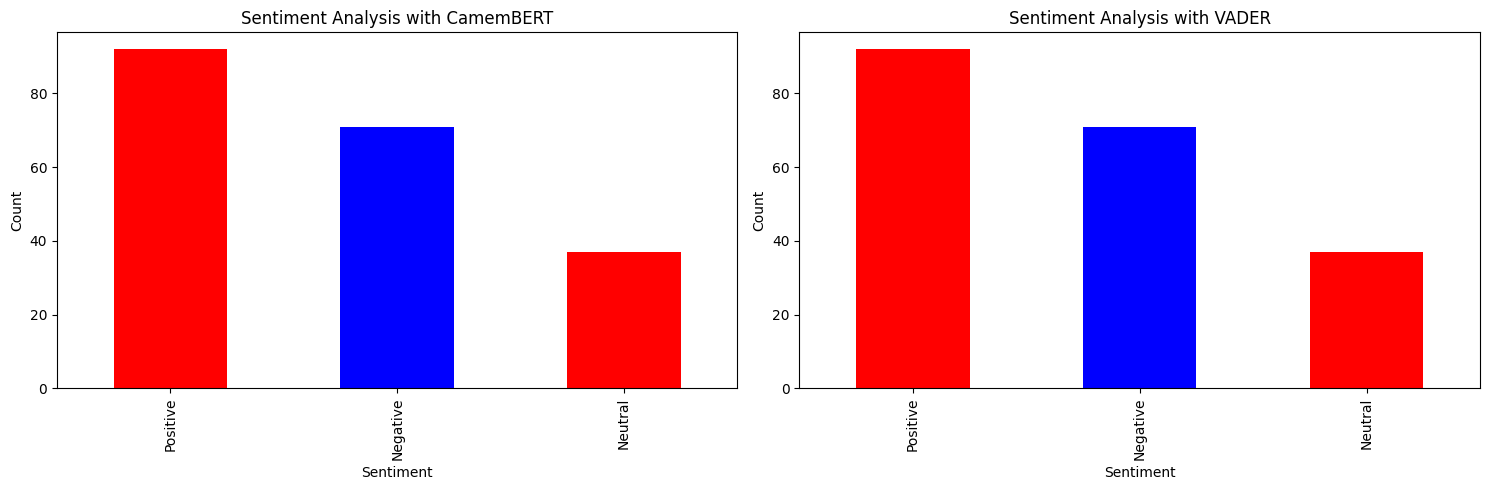

In [ ]:
import matplotlib.pyplot as plt

# Count sentiment predictions for each model
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for i, (model, col) in enumerate(
    zip(["CamemBERT", "VADER"], ["sentiment_camembert", "sentiment_vader"])
):
    df[col].value_counts().plot(kind="bar", ax=axes[i], color=["red", "blue"])
    axes[i].set_title(f"Sentiment Analysis with {model}")
    axes[i].set_xlabel("Sentiment")
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()
